# Linear Regression

Generally speaking, a simple linear model makes predictions by computing a weighted sum of the input features, plus a constant called bias.

$$
\hat y = w_0 + w_1x_1 + ... +w_nx_n
$$

The above formula can be written in the matrix form as follows:

$$
\hat y = w^Tx
$$


Training is nothing but adjusting the model parameters to minimize the loss. For regression problem, one of the loss function is the Root Mean Squared Error. However, it's more convenient to calculate the Mean Squared Error.

$$
MSE = \frac{1}{N}\sum_N (w^Tx_n - y_n)^2
$$

One way to calculate the value of $w$ is to use the closed-form solution, which gives us the result directly using mathematical equations.

For a simple regression $y = wx + b$, the closed-form solution is given:

$$
b = \hat y - w\hat x \\
w = \frac{Cov(x, y)}{Var(x)}
$$

For multiple linear regressions, the closed-form solution is given:

$$
w = (X^TX)^{-1}X^Ty
$$

where $X^TX$ is invertible



In [6]:
import numpy as np
import matplotlib.pyplot as plt

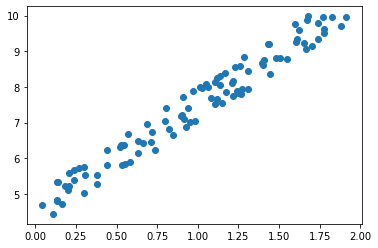

In [10]:
# create some synthetic data
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

plt.scatter(x, y)

### closed-form

In [23]:

x_b = np.c_[np.ones((100, 1)), x] # add one to each observation

w = np.linalg.inv(x_b.T@x_b)@x_b.T@y

w

array([[4.61295253],
       [2.89254127]])

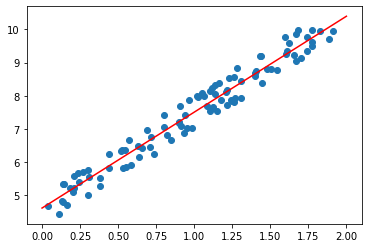

In [27]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predicted = x_new_b @ w

plt.plot(x_new, y_predicted, c='r')
plt.scatter(x, y)

### sklearn

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

print('coef:', reg.coef_, 'bias:', reg.intercept_)

reg.predict(x_new)


coef: [[2.89254127]] bias: [4.61295253]


array([[ 4.61295253],
       [10.39803507]])

## Batch Gradient Descent

Compute the gradient with respect to each model parameter $\theta_i$


$$
\frac{\partial L}{\partial \theta_i} = \frac{-2}{N} \sum_N x_j^{i} (y^{i} - x^{i} w)
$$

$$
\frac{\partial L}{\partial \theta} = \frac{-2}{N} X^T (Y - Xw)
$$

Update parameter

$$
\theta^{t+1} = \theta^{t} - \eta \frac{\partial L}{\partial \theta^t}
$$


- learning rate
    - grid search

- the number of iterations
    - set a large number and then stop the algorithm when the gradient is smaller than a threshold
    

In [45]:
lr = 0.01
num_iters = 1000

N = 100
theta = np.random.rand(2, 1)

for i in range(num_iters):
    grad = -2/N * (x_b.T@(y - x_b @ theta))
    theta -= lr * grad

print(theta)

[[4.53139762]
 [2.96523105]]


# Stochastic Gradient Descent

- Learn faster than the batch gradient descent since it deals with a single data rather than the whole datasets, which means it can handle huge training data sets



- Less regular than the batch gradient descent



- It can find a good minimum but not the best.



- It can be improved by introducing other factors such as momentum.


In [65]:
lr = 0.01
num_iters = 100

N = 100
theta = np.random.rand(2, 1)

for i in range(num_iters):
    for j in range(N):
        random_index = np.random.choice(N, 1)[0]
        x_i = x_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        grad_i = -2 * (x_i.T@(y_i - x_i @ theta))
        theta -= lr * grad_i

print(theta)

[[4.58861733]
 [2.88342612]]


# Polynomial Regression





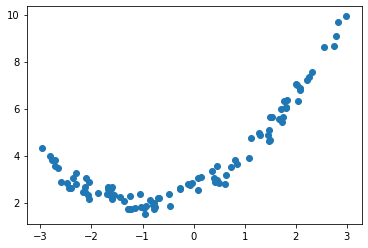

In [168]:
# create some synthetic data
x = 6 * np.random.rand(100, 1) - 3
y = 0.5*x**2 + x + 2 + np.random.rand(100, 1)

plt.scatter(x, y)

coef: [[1.00665405 0.50015816]] bias: [2.55413872]


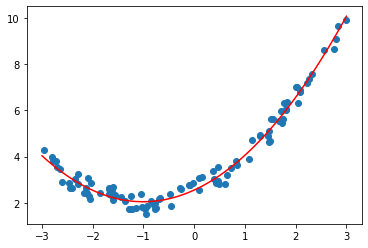

In [169]:
x_poly = np.c_[x, x**2]

reg = LinearRegression()
reg.fit(x_poly, y)

print('coef:', reg.coef_, 'bias:', reg.intercept_)

xl = np.linspace(-3, 3, 100)
xl_poly = np.c_[xl, xl**2]
plt.plot(xl, reg.predict(xl_poly), c='r')
plt.scatter(x, y)


# Learning Curve

In [186]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    train_errors, test_errors = [], []
    
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        
        y_hat = model.predict(X_train[:i])
        y_val_hat = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:i], y_hat))
        test_errors.append(mean_squared_error(y_val, y_val_hat))
    
    fig, ax =plt.subplots()
    ax.plot(np.sqrt(train_errors), label='train')
    ax.plot(np.sqrt(test_errors), label='val')
    ax.set_ylim(0, 3)
    plt.legend()

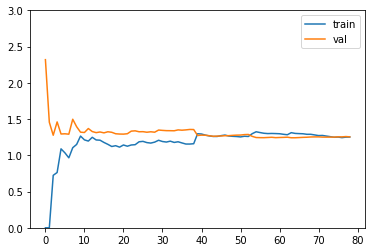

In [187]:
plot_learning_curves(LinearRegression(), x, y)

# simple linear regression to fit the quadratic function, underfitting

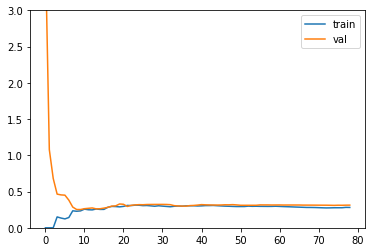

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_2, x, y)


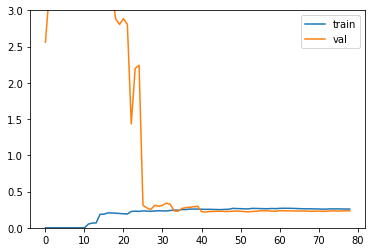

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_10 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=True)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_10, x, y)

# high-degree polynomial regression to fit the quadratic function, overfitting

# Logistic Decision Boundary

https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html



# Bagging

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [80]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


In [77]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

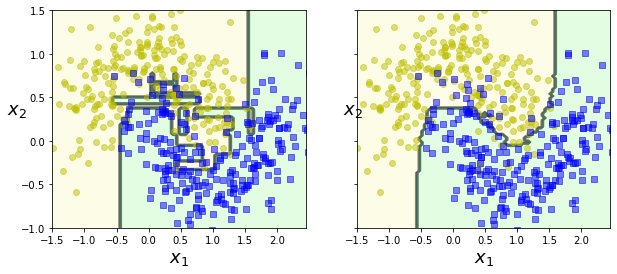

In [83]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

# Gradient Boosting with Early stopping


In order to find the optimal number of trees, you can use early stopping.
A simple way to implement this is to use the `staged_predict()`: it returns an interator over the predictions made by the ensemble at each stage of training.

In [111]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


In [112]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1


In [113]:
best_n_estimators

56

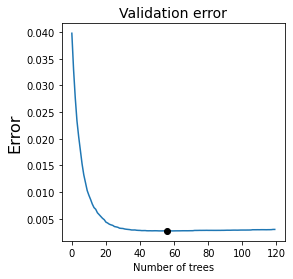

In [122]:
fig, ax= plt.subplots(figsize=(4, 4))
ax.plot(np.arange(len(errors)), errors)
ax.plot(best_n_estimators, np.min(errors), "ko")
ax.set_xlabel("Number of trees")
ax.set_ylabel("Error", fontsize=16)
ax.set_title("Validation error", fontsize=14)

plt.show()

## warm start

It's possible to implement early stopping by actually stopping training early (instead of training a large number of trees first and then looking back to find the optimal number).

In [128]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
for n_estimator in range(1, 100):
    gbrt.n_estimators = n_estimator 
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)

    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up >= 5:
            break


In [129]:
gbrt.n_estimators, min_val_error

(61, 0.002712853325235463)

# PCA

In [134]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [146]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [147]:
X_train.shape, X_test.shape, y_train.shape


((52500, 784), (17500, 784), (52500,))

In [148]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>0.95) + 1

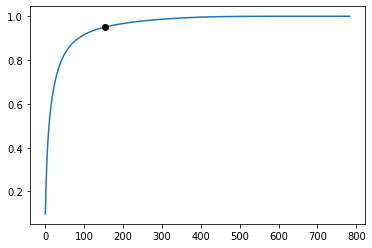

In [151]:

plt.plot(range(len(cumsum)), cumsum)
plt.plot(d, 0.95, "ko")

# Clustering

In [156]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

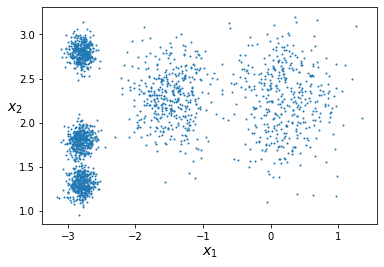

In [161]:
plot_clusters(X)

In [165]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [169]:
y_pred is kmeans.labels_ # the instance keeps a copy of the labels of instances it was trained on


True

In [171]:
kmeans.cluster_centers_ # cluser centroid


array([[-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering.


In [ ]:
X_val = [[-3, 1], [-3, 2], [-3, 3], [-1, 1],[1, 1]]

kmeans.predict(X_val) # make a prediction


In [197]:
kmeans.transform(X_val) # soft c


array([[2.00103321, 0.36103414, 3.44564568, 1.80830868, 0.82483095],
       [1.55962398, 0.7271137 , 3.21892023, 0.82289673, 0.27925993],
       [1.69136631, 1.71086031, 3.29399768, 0.29040966, 1.21475352],
       [1.36796111, 1.82533595, 1.74282011, 2.53802926, 1.97381122],
       [2.78181619, 3.81226403, 1.48403831, 4.19680888, 3.88735326]])

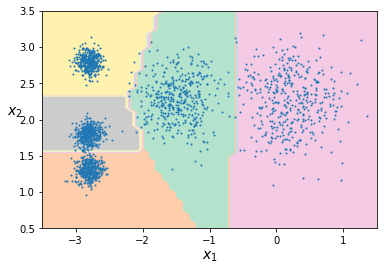

In [194]:
x_s = np.linspace(-3.5, 1.5)
y_s = np.linspace(0.5, 3.5)

x_m, y_m = np.meshgrid(x_s, y_s)
x_p = np.c_[x_m.ravel(), y_m.ravel()]

z_s = kmeans.predict(x_p).reshape(x_m.shape)

plt.contourf(x_s, y_s, z_s, cmap="Pastel2")
plot_clusters(X)

In [198]:
kmeans.inertia_


211.59853725816828

Text(0.55, 0.55, 'Elbow')

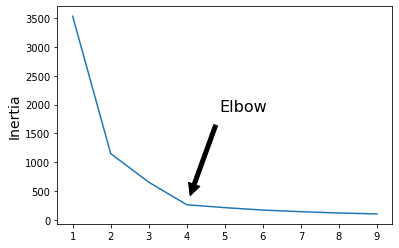

In [264]:
inertia_k = [ KMeans(n_clusters=k).fit(X).inertia_ for k in range(1, 10) ]

plt.plot(np.arange(len(inertia_k))+1, inertia_k)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
     xy=(4, inertia_k[3]),
     xytext=(0.55, 0.55),
     textcoords='figure fraction',
     fontsize=16,
     arrowprops=dict(facecolor='black', shrink=0.1)
)


Text(0, 0.5, 'Silhouette score')

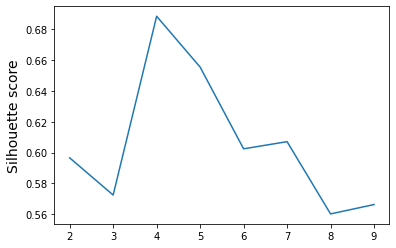

In [265]:
from sklearn.metrics import silhouette_score

model_k = [ KMeans(n_clusters=k).fit(X) for k in range(2, 10) ]
silhouette_score_k = [ silhouette_score(X, m.labels_) for m in model_k ]

plt.plot(np.arange(len(silhouette_score_k))+2, silhouette_score_k)
plt.ylabel("Silhouette score", fontsize=14)


## Image Segmentation


In [205]:
import os
import urllib

images_path='./data'
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('./data/ladybug.png', <http.client.HTTPMessage at 0x7fa1614a5ca0>)

In [206]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))

image.shape


(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

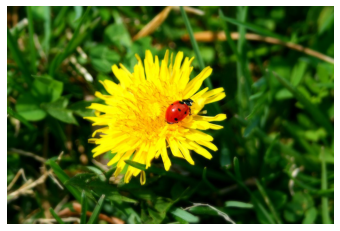

In [214]:
plt.imshow(image)
plt.axis('off')


In [224]:
image.reshape(-1, 3)


array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]], dtype=float32)

(-0.5, 799.5, 532.5, -0.5)

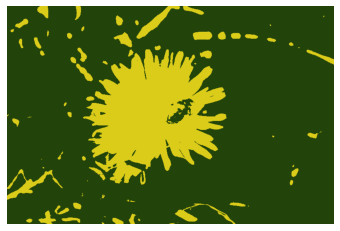

In [223]:
lady_kmeans = KMeans(n_clusters=2)
lady_kmeans.fit(image.reshape(-1, 3))

plt.imshow(lady_kmeans.cluster_centers_[lady_kmeans.labels_].reshape(image.shape))
plt.axis('off')


## Using clustering for preprocessing

In [273]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

X_train.shape, y_train.shape


((1347, 64), (1347,))

In [306]:
digit_kmeans = KMeans(n_clusters=50, random_state=42)

digit_kmeans.fit(X_train)

digit_kmeans.labels_, digit_kmeans.cluster_centers_.shape


(array([13, 14, 26, ..., 39,  4, 10], dtype=int32), (50, 64))

In [327]:
digit_X_new = digit_kmeans.transform(X_train)
digit_X_test_new = digit_kmeans.transform(X_test)


In [328]:
from sklearn.linear_model import LogisticRegression

lg_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

lg_reg.fit(digit_X_new, y_train)

lg_reg.score(digit_X_test_new, y_test)


0.98

# Gaussian Mixture Model

# Exercise

4. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

6. Train and fine-tune a Decision Tree for the moons dataset by following these steps:

Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

b. Use train_test_split() to split the dataset into a training set and a test set.

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.


6. Grow a forest by following these steps:

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s ShuffleSplit class for this.

b. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you maMority-vote predictions over the test set.

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!


3.

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. 5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

3. 

Tackle the Titanic dataset.

3. Build a spam classifier (a more challenging exercise)

https://spamassassin.apache.org/old/publiccorpus/


Unzip the datasets and familiarize yourself with the data format.

Split the datasets into a training set and a test set.

Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.



You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.




7. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM classifier. Next, try to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?

7, Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on this new training set. Congratulations, you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?

8. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

9. . The classic Olivetti faces dataset contains 400 grayscale 64 × 64pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?


9. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

9. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

9. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.